In [1]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(work_path)

from my_helper.regression import *
from my_helper.util import *
from my_helper.plot import *
from my_helper.analysis import *
from my_helper.classification import *
from yjk_module.preprocessing import *
from yjk_module.ml_module import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve
from statsmodels.formula.api import logit
from statsmodels.api import Logit, add_constant

In [2]:
origin = pd.read_excel("./data/titanic.xlsx")
df = origin.copy()

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [5]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
df.dropna(subset = ['Fare', 'Embarked'], inplace = True)

In [9]:
cols = ['Pclass', 'Parch', 'SibSp']

for i in cols:
    df[i] = df[i].astype('category')

In [10]:
pp = YjkPreprocessor()
pp.set_strategy(outline = None, null = 'median')

아래와 같이 처리합니다.
+-------------+----------------+
| 범주        | 처리방법       |
|-------------+----------------|
| 이상치 처리 | 처리하지 않음  |
| 결측치 처리 | 중앙값 대체    |
| 스케일러    | StandardScaler |
| 인코딩      | 원핫인코딩     |
+-------------+----------------+


In [11]:
df_p = pp.fit_transform(df, yname = 'Survived')

데이터프레임 크기 : (1306, 8)

[열별 결측치 개수]
+--------+-------------+
| 열명   |   결측치 수 |
|--------+-------------|
| Age    |         263 |
+--------+-------------+

연속형 데이터 컬럼 : ['Age', 'Fare'], 총 2개
명목형 데이터 컬럼 : ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], 총 5개
종속변수 컬럼명 : Survived


In [12]:
x_train, x_test, y_train, y_test = my_train_test_split(data = df_p, yname = 'Survived', test_size = 0.2, random_state = 0)

In [13]:
lr = LogisticRegression(penalty = 'l2', C = 1)

In [14]:
lr.fit(x_train, y_train)

LogisticRegression(C=1)

In [15]:
lr.score(x_train, y_train), lr.score(x_test, y_test)

(0.8639846743295019, 0.8549618320610687)

In [16]:
roc_auc_score(y_test, lr.predict_proba(x_test)[:, 1])

0.9199142156862744

In [17]:
df2 = origin.copy()

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [19]:
df2.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [20]:
df2['Age'] = my_replace_missing_value(df2[['Age']])

In [21]:
df2.dropna(inplace = True)

In [22]:
pp2 = YjkPreprocessor()
pp2.set_strategy(outline = None, null = None)

아래와 같이 처리합니다.
+-------------+----------------+
| 범주        | 처리방법       |
|-------------+----------------|
| 이상치 처리 | 처리하지 않음  |
| 결측치 처리 | 처리하지 않음  |
| 스케일러    | StandardScaler |
| 인코딩      | 원핫인코딩     |
+-------------+----------------+


In [23]:
cols = ['Pclass']
for i in cols:
    df2[i] = df2[i].astype('category')

df2.drop('PassengerId', axis = 1, inplace = True)

In [24]:
df2_p = pp2.fit_transform(df2, yname = 'Survived', drop = 'first')

데이터프레임 크기 : (1306, 8)
데이터프레임에 결측치는 없습니다.
연속형 데이터 컬럼 : ['Age', 'SibSp', 'Parch', 'Fare'], 총 4개
명목형 데이터 컬럼 : ['Pclass', 'Sex', 'Embarked'], 총 3개
종속변수 컬럼명 : Survived


In [25]:
df2_p.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Survived
0,-0.609933,0.479763,-0.445612,-0.501949,0.0,1.0,1.0,0.0,1.0,0
1,0.636914,0.479763,-0.445612,0.735501,0.0,0.0,0.0,0.0,0.0,1
2,-0.298221,-0.479763,-0.445612,-0.488905,0.0,1.0,0.0,0.0,1.0,1
3,0.403130,0.479763,-0.445612,0.384107,0.0,0.0,0.0,0.0,1.0,1
4,0.403130,-0.479763,-0.445612,-0.486489,0.0,1.0,1.0,0.0,1.0,0


In [26]:
x_train, x_test, y_train, y_test = my_train_test_split(df2_p, yname = 'Survived')

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
| 13 |    10 | l2        |          0.856321 |
| 16 |   100 | l2        |          0.856321 |
| 10 |     1 | l2        |          0.854403 |
|  7 |   0.1 | l2        |          0.851537 |
|  4 |  0.01 | l2        |          0.781625 |
|  1 | 0.001 | l2        |          0.636019 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.438352 |      0.45541 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.858238 |     0.851145 | 예측 결과(TN,FP,TP,TN)가 실제 결과

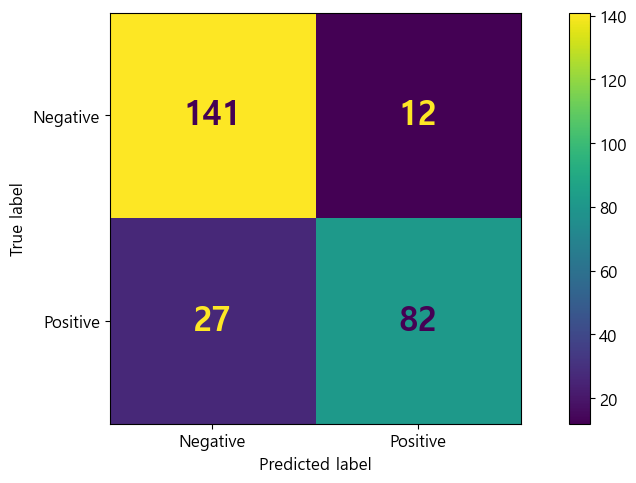


[ROC/PR Curve]


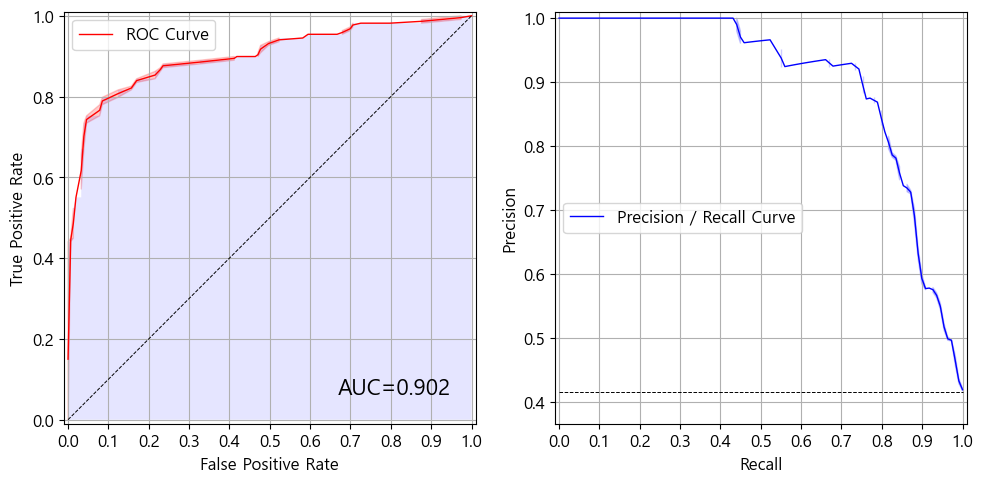


[학습곡선]


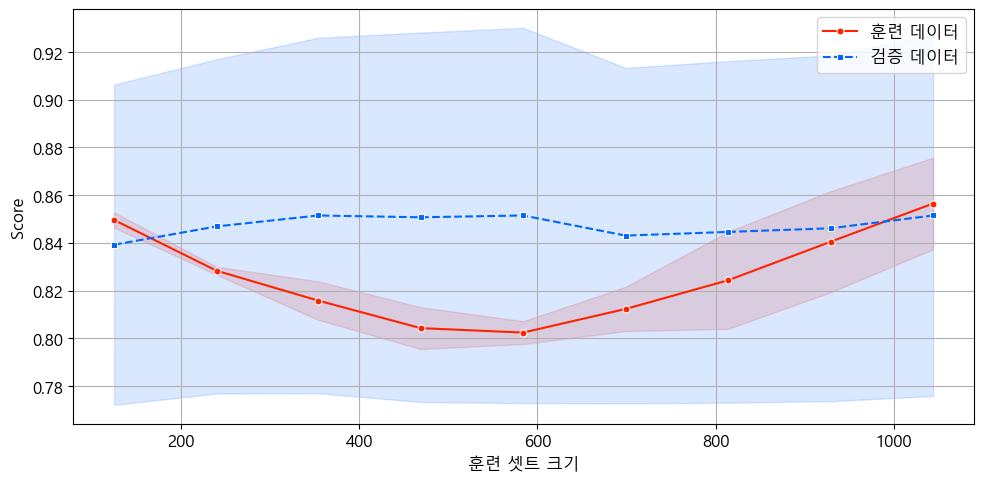

+----+------------+------------+--------------------+------------+---------+------------+------------+
|    | 종속변수   | 독립변수   |   B(비표준화 계수) |   표준오차 |       t |   유의확률 |   OddsRate |
|----+------------+------------+--------------------+------------+---------+------------+------------|
|  0 | Survived   | Age        |            -0.3706 |      0.207 | -1.7894 |      0.074 |     0.6903 |
|  1 | Survived   | SibSp      |            -0.3495 |      0.273 | -1.2784 |      0.201 |     0.7051 |
|  2 | Survived   | Parch      |            -0.0598 |      0.303 |  -0.197 |      0.844 |      0.942 |
|  3 | Survived   | Fare       |             0.1603 |      0.301 |  0.5325 |      0.594 |     1.1739 |
|  4 | Survived   | Pclass_2   |            -0.8571 |      0.625 | -1.3725 |       0.17 |     0.4244 |
|  5 | Survived   | Pclass_3   |            -1.8734 |      0.617 | -3.0341 |      0.002 |     0.1536 |
|  6 | Survived   | Sex_male   |            -3.6728 |       0.42 | -8.7477 |          0 |     0

In [27]:
model = my_logistic_classification(x_train, y_train, x_test, y_test)

In [28]:
test = pd.DataFrame([
    {'Fare' : 0, 'Pclass' : 3, 'Sex' : 'male', 'Embarked' : 'S', 'Age' : 19, 'SibSp' : 0, 'Parch' : 0},
    {'Fare' : 100, 'Pclass' : 1, 'Sex' : 'female', 'Embarked' : 'C', 'Age' : 17, 'SibSp' : 1, 'Parch' : 1},
    {'Fare' : 150, 'Pclass' : 1, 'Sex' : 'male', 'Embarked' : 'Q', 'Age' : 34, 'SibSp' : 2, 'Parch' : 0}
])

In [29]:
test['Pclass'] = test['Pclass'].astype('category')

In [30]:
test

,Fare,Pclass,Sex,Embarked,Age,SibSp,Parch
0,0,3,male,S,19,0,0
1,100,1,female,C,17,1,1
2,150,1,male,Q,34,2,0


In [31]:
test_p = pp2.transform(test)
test_p

데이터프레임 크기 : (3, 7)
데이터프레임에 결측치는 없습니다.


,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,-0.843717,-0.479763,-0.445612,-0.642056,0.0,1.0,1.0,0.0,1.0
1,-0.999573,0.479763,0.709088,1.290454,0.0,0.0,0.0,0.0,0.0
2,0.325202,1.439290,-0.445612,2.256709,0.0,0.0,1.0,1.0,0.0


In [32]:
model.predict(test_p)

array([0, 1, 0], dtype=int64)

In [34]:
col_n = ['Age', 'Fare']

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
pf = PolynomialFeatures(degree = 2, include_bias = False)

In [54]:
poly_df = (pd.DataFrame(pf.fit_transform(df2[col_n]), columns = pf.get_feature_names_out(), index = df2.index))

In [55]:
df3 = pd.concat([df2, poly_df.iloc[:, 2:]], axis = 1)

In [56]:
df3

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age^2,Age Fare,Fare^2
0,0,3,male,22.000000,1,0,7.2500,S,484.000000,159.500000,52.562500
1,1,1,female,38.000000,1,0,71.2833,C,1444.000000,2708.765400,5081.308859
2,1,3,female,26.000000,0,0,7.9250,S,676.000000,206.050000,62.805625
3,1,1,female,35.000000,1,0,53.1000,S,1225.000000,1858.500000,2819.610000
4,0,3,male,35.000000,0,0,8.0500,S,1225.000000,281.750000,64.802500
...,...,...,...,...,...,...,...,...,...,...,...
1304,0,3,male,29.881138,0,0,8.0500,S,892.882388,240.543158,64.802500
1305,1,1,female,39.000000,0,0,108.9000,C,1521.000000,4247.100000,11859.210000
1306,0,3,male,38.500000,0,0,7.2500,S,1482.250000,279.125000,52.562500
1307,0,3,male,29.881138,0,0,8.0500,S,892.882388,240.543158,64.802500


In [58]:
pp3 = YjkPreprocessor()
pp3.set_strategy(outline = None, null = None)

아래와 같이 처리합니다.
+-------------+----------------+
| 범주        | 처리방법       |
|-------------+----------------|
| 이상치 처리 | 처리하지 않음  |
| 결측치 처리 | 처리하지 않음  |
| 스케일러    | StandardScaler |
| 인코딩      | 원핫인코딩     |
+-------------+----------------+


In [61]:
df3_p = pp3.fit_transform(df3, yname = 'Survived')

데이터프레임 크기 : (1306, 11)
데이터프레임에 결측치는 없습니다.
연속형 데이터 컬럼 : ['Age', 'SibSp', 'Parch', 'Fare', 'Age^2', 'Age Fare', 'Fare^2'], 총 7개
명목형 데이터 컬럼 : ['Pclass', 'Sex', 'Embarked'], 총 3개
종속변수 컬럼명 : Survived


In [62]:
x_train, x_test, y_train, y_test = my_train_test_split(df3_p, yname = 'Survived')

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
| 10 |     1 | l2        |           0.85824 |
| 13 |    10 | l2        |           0.85824 |
| 16 |   100 | l2        |           0.85824 |
|  7 |   0.1 | l2        |          0.852489 |
|  4 |  0.01 | l2        |          0.844838 |
|  1 | 0.001 | l2        |          0.651343 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.441928 |     0.461482 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.860153 |     0.854962 | 예측 결과(TN,FP,TP,TN)가 실제 결과

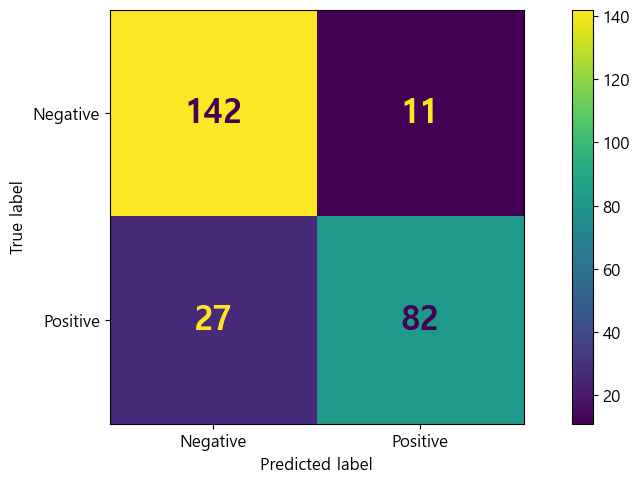


[ROC/PR Curve]


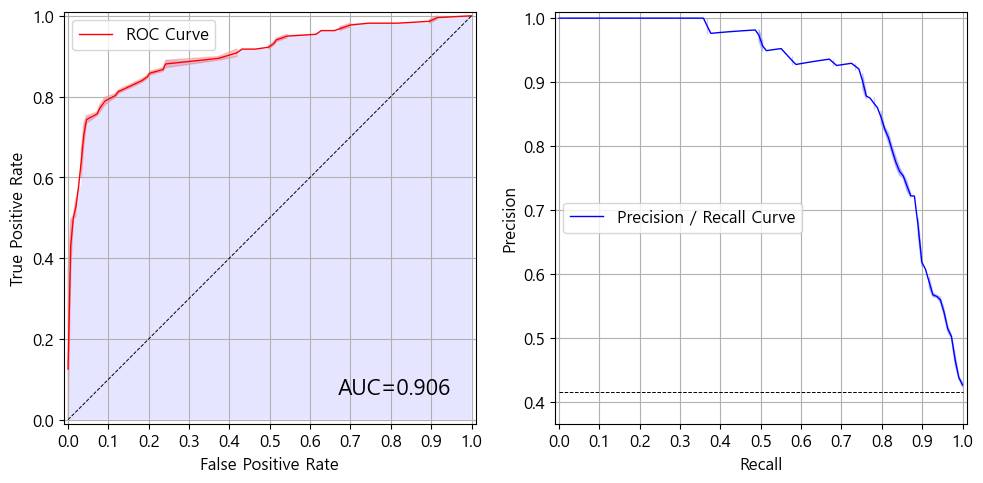


[학습곡선]


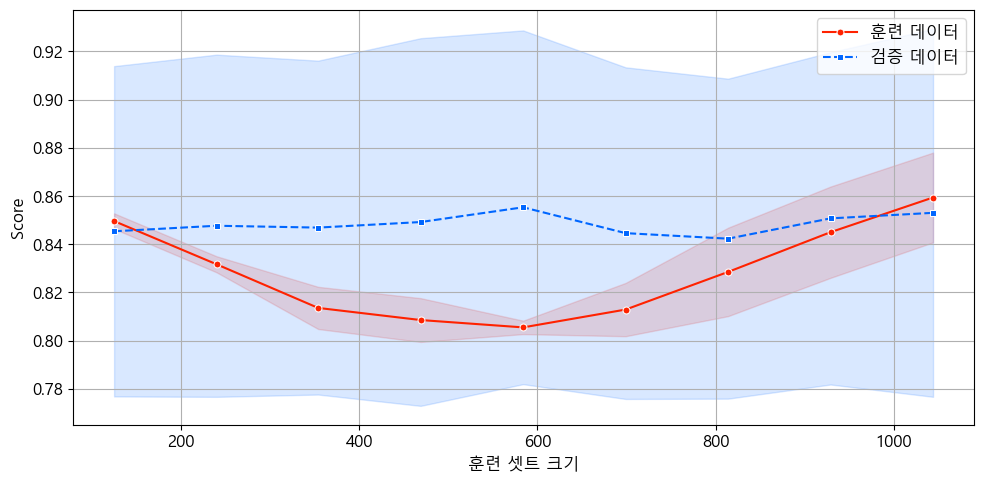

+----+------------+------------+--------------------+-------------+---------+------------+------------+
|    | 종속변수   | 독립변수   |   B(비표준화 계수) |    표준오차 |       t |   유의확률 |   OddsRate |
|----+------------+------------+--------------------+-------------+---------+------------+------------|
|  0 | Survived   | Age        |            -0.8383 |       0.709 | -1.1832 |      0.237 |     0.4324 |
|  1 | Survived   | SibSp      |            -0.3542 |        0.28 |  -1.264 |      0.206 |     0.7017 |
|  2 | Survived   | Parch      |            -0.0636 |        0.32 | -0.1988 |      0.842 |     0.9384 |
|  3 | Survived   | Fare       |            -0.1294 |       0.803 | -0.1611 |      0.872 |     0.8786 |
|  4 | Survived   | Age^2      |              0.444 |       0.686 |  0.6472 |      0.518 |      1.559 |
|  5 | Survived   | Age Fare   |             0.2562 |       0.514 |  0.4984 |      0.618 |      1.292 |
|  6 | Survived   | Fare^2     |             0.0792 |       0.909 |  0.0872 |      0.9

In [63]:
model = my_logistic_classification(x_train, y_train, x_test, y_test)